In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords, words
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Эдуард\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Эдуард\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Эдуард\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [11]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df = df.dropna(how="any", axis=1)
df.columns = ['target', 'message']
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.shape

(5572, 2)

## Mapping the target

In [14]:
df["target"] = df["target"].map({"ham":0, "spam":1})
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


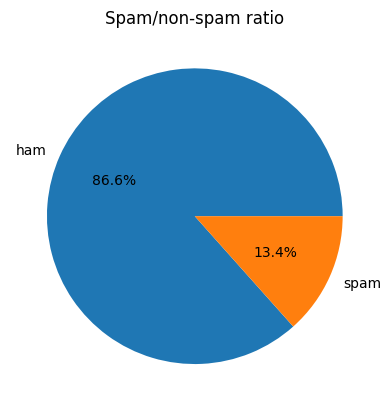

In [23]:
spam_ham_count = df["target"].value_counts()
plt.pie(spam_ham_count, labels=["ham", "spam"], autopct='%1.1f%%')
plt.title("Spam/non-spam ratio")
plt.show()

## Train-test split

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X = pd.DataFrame(df["message"], columns=["message"])
y = df["target"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Words Count

In [31]:
def count_words(data):
    counter = collections.Counter()
    for message in data:
        for word in message.split(' '):
            if word in counter:
                counter[word] += 1
            else:
                counter[word] = 1
    return counter

In [44]:
spam_messages = set(X_train[y_train == True]["message"])
spam_words = count_words(spam_messages)
ham_messages = set(X_train[y_train == False]["message"])
ham_words = count_words(ham_messages)

In [49]:
def bar_chart_words(words, top=10, messages_type="", color="#1f77b4"):
    top_spam = np.array(words.most_common(top))
    top_words = top_spam[ : :-1, 0]
    top_words_count = [int(i) for i in top_spam[ : :-1, 1]]
    if messages_type:
        messages_type = messages_type + " " 
    plt.title(f"Top {top} most common words in {messages_type}messages")
    plt.xlabel(f"Number of words")
    plt.barh(top_words, top_words_count, color=color)
    plt.show()

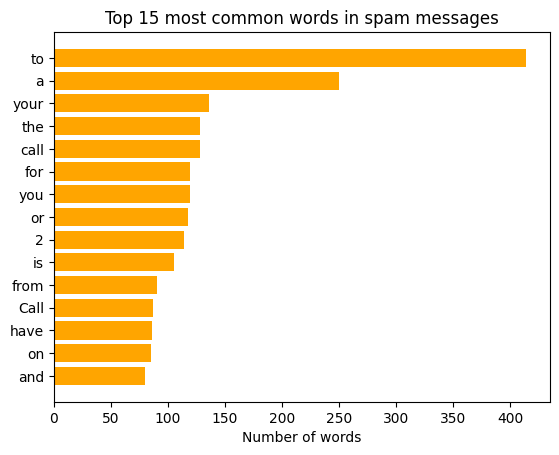

In [50]:
bar_chart_words(spam_words, top=15, messages_type="spam", color="orange")

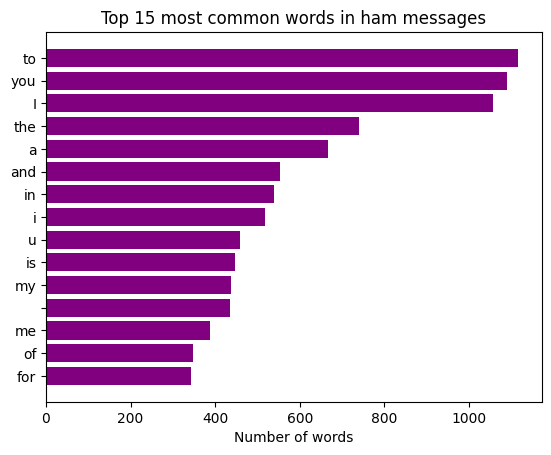

In [52]:
bar_chart_words(ham_words, top=15, messages_type="ham", color="purple")

## Most of these words are uninformative. Therefore, we have to preprocess our corpus of texts by removing stop words, articles, punctuation marks, etc.

In [66]:
eng_words = words.words()
print(eng_words[:100])
wordlist = set(eng_words)

['A', 'a', 'aa', 'aal', 'aalii', 'aam', 'Aani', 'aardvark', 'aardwolf', 'Aaron', 'Aaronic', 'Aaronical', 'Aaronite', 'Aaronitic', 'Aaru', 'Ab', 'aba', 'Ababdeh', 'Ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally', 'abaction', 'abactor', 'abaculus', 'abacus', 'Abadite', 'abaff', 'abaft', 'abaisance', 'abaiser', 'abaissed', 'abalienate', 'abalienation', 'abalone', 'Abama', 'abampere', 'abandon', 'abandonable', 'abandoned', 'abandonedly', 'abandonee', 'abandoner', 'abandonment', 'Abanic', 'Abantes', 'abaptiston', 'Abarambo', 'Abaris', 'abarthrosis', 'abarticular', 'abarticulation', 'abas', 'abase', 'abased', 'abasedly', 'abasedness', 'abasement', 'abaser', 'Abasgi', 'abash', 'abashed', 'abashedly', 'abashedness', 'abashless', 'abashlessly', 'abashment', 'abasia', 'abasic', 'abask', 'Abassin', 'abastardize', 'abatable', 'abate', 'abatement', 'abater', 'abatis', 'abatised', 'abaton', 'abator', 'abattoir', '

In [69]:
stop_words = stopwords.words('english')

In [77]:
def process_message(message):  
    words = message.lower() # lowercase
    words = word_tokenize(words) # tokenization
    words = [word for word in words if len(word) > 1] # non one-letter words          
    words = [word for word in words if word not in stop_words] # non stop words
    words = [word for word in words if word in wordlist] # english words
    words = [PorterStemmer().stem(word) for word in words] # stemming
    return words

In [78]:
def count_processed_words(data):
    counter = collections.Counter()
    for message in data:
        words = process_message(message)
        for word in set(words):           
            if word in counter:
                counter[word] += 1
            else:
                counter[word] = 1
    return counter

In [79]:
spam_words = count_processed_words(spam_messages)
ham_words = count_processed_words(ham_messages)

In [80]:
spam_words.most_common(25)

[('call', 219),
 ('free', 115),
 ('ur', 79),
 ('claim', 72),
 ('mobil', 68),
 ('repli', 67),
 ('stop', 65),
 ('text', 65),
 ('get', 55),
 ('prize', 51),
 ('new', 50),
 ('urgent', 44),
 ('send', 44),
 ('cash', 41),
 ('win', 41),
 ('pleas', 40),
 ('collect', 39),
 ('servic', 39),
 ('contact', 37),
 ('phone', 33),
 ('per', 32),
 ('tri', 30),
 ('draw', 29),
 ('custom', 28),
 ('tone', 27)]

# I. Spam Classification with Naive Bayes

In [81]:
spam_messages = [i for i in spam_messages if len(process_message(i)) >= 1]
ham_messages = [i for i in ham_messages if len(process_message(i)) >= 1]
all_messages = spam_messages + ham_messages
all_words = count_processed_words(all_messages)

### Bayes Theorem
$$P(S|W)= \frac{P(W|S)⋅P(S)}{P(W|S)⋅P(S)+P(W|H)⋅P(H)}$$,
 
where,

* $ P(S|W) $ is the probability that a message is a spam, knowing that a specific word is in it;
* $ P(W|S) $ is the probability that the specific word appears in spam messages;
* $ P(S) $ is the overall probability that any given message is spam;
* $ P(W|H) $ is the probability that the specific word appears in ham messages;
* $ P(H) $ is the overall probability that any given message is ham.

#### But we want our filter to be unbiased toward incoming email, so we are going to assume that the probabilities of receiving both spam and ham are equal to 50%. This allows us to simplify the formula to the following:

$$ P(S|W)=\frac{P(W|S)}{P(W|S)+P(W|H)}$$
 
#### Our training dataset already has some marked mail, so we know the total number of spam and ham messages. All that's left to do is count in how many of the spam and ham messages respectively, the specific word is present.

$$
P(W|S) = \frac{\text{spam messages containing the word}}{\text{all messages containing the word}}
$$

 
$$
P(W|H) = \frac{\text{ham messages containing the word}}{\text{all messages containing the word}}
$$


#### Now, words in a message are usually not independent of each other, but for simplicity's sake we're going to assume that they are. Bearing that in mind, we can get the spam probability of the message if we combine the spam probabilities of all the words in it like this:

$$p=\frac{p1p2⋯pN}{p1p2⋯pN+(1−p1)(1−p2)⋯(1−pN)}$$
 
where,

* $ p $ is the probability that the suspect message is spam;
* $ p_{1} $ is the probability $ p(S|W_{1}) $ that it is a spam knowing it contains some first word;
* $ p_{2} $ is the probability $ p(S|W_{2}) $ that it is a spam knowing it contains some second word;
* $ p_{n} $ is the probability $ p(S|W_{N}) $ that it is a spam knowing it contains some Nth word.

#### In order to avoid floating-point underflow, we are going to use the alternative form of the formula which looks like this:
####    $p=1/(1+e^η)$
 
####    where,
$$
\eta = \sum_{i=1}^{n} \ln(1 - p_i) - \ln(p_i)
$$
 
#### What happens if we get a word that was never encountered in the learning phase? We get $ \frac{0}{0} $. That's why we're going to ignore such words and carry on. Rare words also cause problems to our calculations and a way to deal with this is to use a corrected probability:

$$P'(S|W) = \frac{s⋅P(S)+n⋅P(S|W)}{(s+n)}$$
 
####    where,

* $ P'(S | W) $ is the corrected probability for the message to be spam, knowing that it contains a given word;
* $ s $ is the strength we give to background information about incoming spam;
* $ P(S) $ is the probability of any incoming message to be spam;
* $ n $ is the number of occurrences of this word during the learning phase;
* $ P(S|W) $ is the spaminess of this word.
#### We use this corrected probability instead of the spaminess of the word and finally we get the probability that a message is spam. If it's greater than 50%, we classify the message as spam.



In [99]:
def spam(message, s=1, p=0.5):
    n = 0
    spam_freq = 0
    ham_freq = 0
    
    for word in process_message(message):
        if word in spam_words.keys(): 
            spam_freq = (spam_words[word] / all_words[word])
            
        if word in ham_words.keys():
            ham_freq = (ham_words[word] / all_words[word])
            
        # if word is not in trained dataset we ignore it    
        if not (spam_freq + ham_freq) == 0 and word in all_words.keys(): 
            spaminess_of_word = (spam_freq ) / (spam_freq  + ham_freq )
            corr_spaminess = (s * p + all_words[word] * spaminess_of_word) / (s + all_words[word])            
            n += np.log(1 - corr_spaminess) - np.log(corr_spaminess)

    spam_result = 1 / (1 + np.e**n)
    
    return spam_result

In [100]:
spam("Mr. John, you've won the prize. To claim it, please call this number")

0.9998851421241245

In [101]:
spam("Hey Mr. John, we have evaluated your resume and are ready to invite you for an interview at our company.")

0.0008458151987770144

In [102]:
spam("Call me when you get home")

0.004584044676020958

In [103]:
spam("Call me now to win a FREE home!")

0.21401558052729533

In [104]:
spam("Call now to win a FREE prize!")

0.9870902584596102

# Testing

In [124]:
from sklearn.metrics import classification_report

In [137]:
def classification_quality_report(X_test, y_test, classification_func, threshold=0.5):
    y_pred = (X_test["message"].apply(classification_func) > threshold).astype(np.int64)
    y_test.astype(np.int64)
    print(metrics.classification_report(y_test, y_pred, target_names=["ham", "spam"]))

In [138]:
classification_quality_report(X_test, y_test, spam)

              precision    recall  f1-score   support

         ham       0.94      0.99      0.97      1206
        spam       0.93      0.63      0.75       187

    accuracy                           0.94      1393
   macro avg       0.94      0.81      0.86      1393
weighted avg       0.94      0.94      0.94      1393



#### testing on whole dataset

In [139]:
classification_quality_report(X, y, spam)

              precision    recall  f1-score   support

         ham       0.95      0.99      0.97      4825
        spam       0.92      0.65      0.76       747

    accuracy                           0.95      5572
   macro avg       0.93      0.82      0.87      5572
weighted avg       0.94      0.95      0.94      5572



# II. Bag-of-words vectorization of messages

In [177]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

In [178]:
X_train_dtm = vect.fit_transform(X_train["message"])
X_test_dtm = vect.transform(X_test["message"])

print(type(X_train_dtm), X_train_dtm.shape)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4179, 7465)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 7465)


In [179]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(X_train_dtm, y_train)

In [180]:
y_pred_class = nb.predict(X_test_dtm)

print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1206
           1       0.98      0.91      0.94       187

    accuracy                           0.99      1393
   macro avg       0.98      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



# III. TF-IDF 

In [185]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

pipe.fit(X_train["message"], y_train)
y_pred = pipe.predict(X_test["message"])

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1206
           1       1.00      0.67      0.81       187

    accuracy                           0.96      1393
   macro avg       0.98      0.84      0.89      1393
weighted avg       0.96      0.96      0.95      1393

